# Capstone Project

Learning Objectives:

- Incorporate Illinois Reboot toolchain into a single nose-to-tail project.

## The Data Set

You work for a regional soft drink distribution center that has access to invoice data from convenience stores (`invoices.csv`), product data (`items.csv`), and customer reviews (the files in `reviews/`).

You would like to examine the data for a few features, then plug them into a recommendation engine to see if you can improve sales.

For instance, each data set should be validated and the fields (columns), basic data statistics, and any outliers should be reported.  Then further analysis can take place.

You may use Bash, Python (likely Pandas), SQL, and Git to complete this project.  I make some suggestions at various junctures to consider using particular tools, but feel free to solve the problem in any manner your team finds fitting.  _The entire team should read the entire project and discuss before making any decisions about platform._

You should produce a final report which responds to all of the **bolded** questions and includes full code and an explanation of its use.  You should not use a spreadsheet tool to complete any part of this project even if tempted—in particular, the `invoices.csv` file is too large to load in Microsoft Excel.

In general, feel free to reach out to me.  Follow the outline, but make this _your_ project.

### `items.csv`

The first data set you have available is a table of soft drink products with various data.  **Produce a brief report of the field names and associated column statistics for the table.**  Consider producing scatter plots of certain values, such as the bottle volume.

Each time you load a data table, you should carefully consider which fields should be numeric and which text.  For instance, a name is clearly text while a volume is numeric.  A product ID even if all numeric should be text, though.  (Can you think of why?)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
import math

In [19]:
item = pd.read_csv ('data_code/data_code/item.csv' )
print (item)

      Item_id            Item_Description         Category  Pack  \
0         101     Kanna's Grapefruit Soda  Grapefruit Soda     6   
1         102      Alphonse's Fruit Punch      Fruit Punch     6   
2         103    Yummy Surstromming Juice              NaN     1   
3         107   Tamaki's Watermelon Cream       Cream Soda     6   
4         108     Kaori's Grapefruit Soda  Grapefruit Soda     6   
...       ...                         ...              ...   ...   
4161   994644        Saitama's Cream Soda       Cream Soda     6   
4162   994786  Kenji's Vanilla Cream Soda       Cream Soda     6   
4163   994972  Tanya's Vanilla Cream Soda       Cream Soda     6   
4164   995606         Sakura's Cream Soda       Cream Soda    12   
4165   996026        Tetsuya's Cream Soda       Cream Soda     6   

      Bottle_Volume_ml  Bottle_Cost  Bottle_Retail_Price  
0                750.0         4.32                 6.48  
1                800.0         3.33                 5.00  
2     

In [20]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4166 entries, 0 to 4165
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_id              4166 non-null   int64  
 1   Item_Description     4166 non-null   object 
 2   Category             4162 non-null   object 
 3   Pack                 4166 non-null   int64  
 4   Bottle_Volume_ml     4166 non-null   float64
 5   Bottle_Cost          4166 non-null   float64
 6   Bottle_Retail_Price  4163 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 228.0+ KB


In [21]:
print (item.describe()) #used to fine the mean, min, and max

             Item_id         Pack  Bottle_Volume_ml  Bottle_Cost  \
count    4166.000000  4166.000000       4166.000000  4166.000000   
mean   154512.392943    11.260442        936.963274     3.648721   
std    292382.354448    11.913901       6244.415564     9.348512   
min       101.000000     1.000000          0.000000     1.500000   
25%     28799.250000     6.000000        750.000000     2.360000   
50%     43336.500000    12.000000        750.000000     2.860000   
75%     78591.500000    12.000000        750.000000     3.610000   
max    996026.000000   336.000000     378000.000000   500.000000   

       Bottle_Retail_Price  
count          4163.000000  
mean              5.485763  
std              14.027764  
min               2.450000  
25%               3.580000  
50%               4.300000  
75%               5.420000  
max             750.000000  


### `invoices.csv`

The invoice data set is quite large, too large in fact to be loaded by a conventional spreadsheet program.  Thus you will need to use Python or SQL to manage the data set.  You will not need to create additional fields (columns) in the table, but you will need to be able to merge data tables.

As before, **produce a report containing the field names and column statistics for the table.**

If using Python, Pandas should be able to readily handle the import.

If using SQL, you can [import the CSV file directly](https://www.sqlite.org/cli.html#importing_csv_files).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
import math

In [8]:
invoice = pd.read_csv ('data_code/data_code/invoice.csv' )

In [9]:
print (invoice)

             Invoice_id        Date  Item_id  Vendor_id          Vendor_Name  \
0       INV-00013400001  2016-08-29    35918        297        Katou Company   
1       INV-00013400002  2016-08-29    23828        297        Katou Company   
2       INV-00013400003  2016-08-29    36908        300    Katsuragi Company   
3       INV-00013400004  2016-08-29    34359         35          Archer Inc.   
4       INV-00013400005  2016-08-29    36903        300    Katsuragi Company   
...                 ...         ...      ...        ...                  ...   
930503     S34122500013  2016-08-25    68031        260      Inuyasha Brands   
930504     S34122500014  2016-08-25    75212        322        Koizumi Group   
930505     S34122500015  2016-08-25    75224        322        Koizumi Group   
930506     S34122500016  2016-08-25    36901        300    Katsuragi Company   
930507     S34122500017  2016-08-25    86692         85  Ayuzawa Corporation   

        Store_id                  Store

In [8]:
invoice.info() #used to find data type, count, and null type

<class 'pandas.core.frame.DataFrame'>
Index: 930508 entries, INV-00013400001 to S34122500017
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          930508 non-null  object
 1   Item_id       930508 non-null  int64 
 2   Vendor_id     930508 non-null  int64 
 3   Vendor_Name   930508 non-null  object
 4   Store_id      930508 non-null  int64 
 5   Store_Name    930508 non-null  object
 6   Address       930508 non-null  object
 7   City_Name     930508 non-null  object
 8   Zip_Code      930508 non-null  int64 
 9   County_id     930508 non-null  int64 
 10  County_Name   930508 non-null  object
 11  Bottles_Sold  930508 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 92.3+ MB


In [4]:
print (invoice.columns) #used to verify the columns

Index(['Date', 'Item_id', 'Vendor_id', 'Vendor_Name', 'Store_id', 'Store_Name',
       'Address', 'City_Name', 'Zip_Code', 'County_id', 'County_Name',
       'Bottles_Sold'],
      dtype='object')


In [5]:
print (invoice.T) #used to reverse the data

Invoice_id               INV-00013400001             INV-00013400002  \
Date                          2016-08-29                  2016-08-29   
Item_id                            35918                       23828   
Vendor_id                            297                         297   
Vendor_Name                Katou Company               Katou Company   
Store_id                            3882                        3882   
Store_Name    Kwik Shop #579 / Davenport  Kwik Shop #579 / Davenport   
Address                2805 TELEGRAPH RD           2805 TELEGRAPH RD   
City_Name                      DAVENPORT                   DAVENPORT   
Zip_Code                           52802                       52802   
County_id                             82                          82   
County_Name                        Scott                       Scott   
Bottles_Sold                           1                           1   

Invoice_id               INV-00013400003             INV-000134

In [7]:
invoice = pd.read_csv ('data_code/data_code/invoice.csv')
invoice.head(5) #used to define the first 5 data sets

,Invoice_id,Date,Item_id,Vendor_id,Vendor_Name,Store_id,Store_Name,Address,City_Name,Zip_Code,County_id,County_Name,Bottles_Sold
0,INV-00013400001,2016-08-29,35918,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
1,INV-00013400002,2016-08-29,23828,297,Katou Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
2,INV-00013400003,2016-08-29,36908,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1
3,INV-00013400004,2016-08-29,34359,35,Archer Inc.,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,8
4,INV-00013400005,2016-08-29,36903,300,Katsuragi Company,3882,Kwik Shop #579 / Davenport,2805 TELEGRAPH RD,DAVENPORT,52802,82,Scott,1


In [6]:
print (invoice.describe()) #used to define the mean, min, and max

             Item_id      Vendor_id       Store_id       Zip_Code  \
count  930508.000000  930508.000000  930508.000000  930508.000000   
mean    46100.761759     257.759544    3475.512880   52132.305486   
std     42887.410193     137.428615     889.217119     823.575059   
min       101.000000      10.000000    2554.000000   51101.000000   
25%     29993.000000     115.000000    2623.000000   51106.000000   
50%     41019.000000     260.000000    3447.000000   52803.000000   
75%     64571.000000     380.000000    4076.000000   52806.000000   
max    996026.000000     987.000000    9922.000000   52807.000000   

           County_id   Bottles_Sold  
count  930508.000000  930508.000000  
mean       87.817790       9.875647  
std         7.308914      22.489171  
min        82.000000       0.000000  
25%        82.000000       2.000000  
50%        82.000000       6.000000  
75%        97.000000      12.000000  
max        97.000000    2160.000000  


In [10]:
invoice.shape

(930508, 13)

In [11]:
duplicate_rows_invoice = invoice[invoice.duplicated()]
print ("number of duplicated rows: "), duplicate_rows_invoice.shape 
#used to see if there are any duplicate rows

number of duplicated rows: 


(None, (0, 13))

In [12]:
print(invoice.isnull().sum())
#used to double check that there are no null values

Invoice_id      0
Date            0
Item_id         0
Vendor_id       0
Vendor_Name     0
Store_id        0
Store_Name      0
Address         0
City_Name       0
Zip_Code        0
County_id       0
County_Name     0
Bottles_Sold    0
dtype: int64


<AxesSubplot:xlabel='Bottles_Sold'>

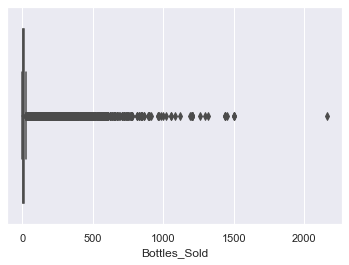

In [13]:
sns.boxplot (x=invoice['Bottles_Sold'])
#to create a box plot of bottles soldtoo look for any extreme values

<AxesSubplot:xlabel='Item_id'>

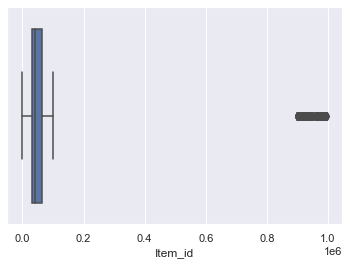

In [14]:
sns.boxplot (x=invoice['Item_id'])
#you can check other values but bottle sold is the most important value

<AxesSubplot:xlabel='Vendor_id'>

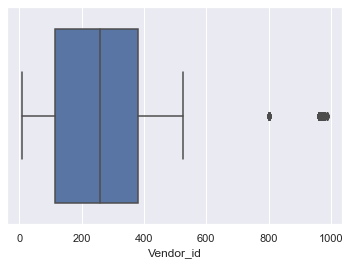

In [15]:
sns.boxplot (x=invoice['Vendor_id'])

Text(0, 0.5, 'Bottles_Sold')

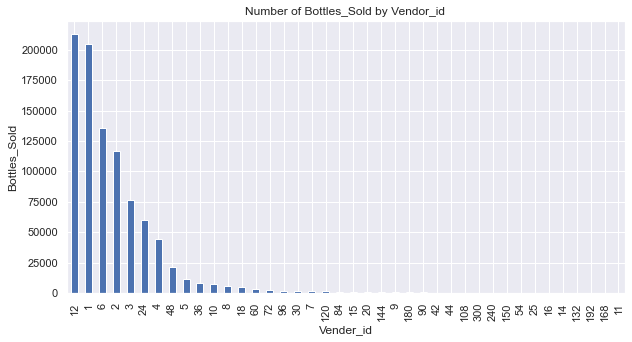

In [17]:
invoice.Bottles_Sold.value_counts() .nlargest(40) .plot (kind='bar', figsize=(10,5))
plt.title('Number of Bottles_Sold by Vendor_id ')
plt.xlabel('Vender_id')
plt.ylabel('Bottles_Sold')

### Reviews

The customer reviews have been stored in separate files with the format

```
Customer ID: 6880
Invoice ID: INV-01352200015
Product Rating: 2/5
```

As there are several thousand of these reviews, you should aggregate them into a single data table for ease of use.  Bash or Python should be preferred; if working in SQL then use Python and the PySQL interface to produce the SQL database.

As there are a lot of these to load, I suggest that you load only a small subset, a hundred or a thousand, first, and get things working before you load the entire data set.

**Produce a short report about the aggregated review database.**

### Merging the Database

Once the data have been loaded into three separate tables, which I will here call `invoices`, `items`, and `reviews`, **you should merge them into each other.**  Your two master records are the invoices, which should never change in number, and the reviews, which are similarly fixed.  The item data can be combined with those.

If using Pandas, you should use a `left` join on `invoices` with `items`.

If using SQL, you should left-join `invoices` to `items`.

This should yield a merged database, `invoices_all`, which contains the invoices as records and includes information about each item sold.

Do the same for the reviews with the item data in `reviews_all`, except that you should `left` join on `reviews` with `invoices`, as not all invoice purchases generated reviews.  You should verify that you can obtain item IDs and rating numbers from the same database, as that will be necessary for the recommendation engine step below.

_(If you need help with this step, reach out to me.  That offer stands for all of this, but this step is perhaps more complicated than some others.)_

## Statistical Analysis of the Invoices

Your manager wants you to take a look at the invoices and see if there's anything useful, salesworthy, or _fishy_ about them.  Now that you have a data table containing the invoices and item data, you are in a good situation to statistically analyze the values involved.

First off, **decide which fields should be examined statistically.**  Does it make sense to correlate against, say, bottle volume?  Number of items in a pack?  Price?  Justify your decisions.

Next, **carry out a basic statistical analysis looking for anomalies and outliers.**  These are loosely defined, but if you don't have a background in statistics, let's say that it's a value that lies at least four standard deviations from the mean, which means it should occur less than 6 in 100,000 times in a data set (0.006% likelihood).

This step is well-suited to Python, in particular the [`scipy.stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html).  If your data tables are in SQL, load them into Python via the PySQL interface.

For instance, a Python-based $t$-test, looking at the likelihood of correlation, could be written as

In [ ]:
df_cs = reviews_all[reviews_all['Category'] == 'Cream Soda']
df_rb = reviews_all[reviews_all['Category'] == 'Root Beer']

from scipy import stats
stats.ttest_ind(df_cs['Rating'],df_rb['Rating'],equal_var=False)

In the result, the `pvalue` parameter is lower than $p=0.05$ if there is statistically significant correlation, greater than 0.05 otherwise.

Besides a quick look at correlations across categories, you should look at the statistical range and any outliers.  For instance, to check for outliers in items sold, we can get the standard deviation and look for records beyond our threshold:

In [ ]:
avg = invoices_all['Bottles_Sold'].mean()
stdev = invoices_all['Bottles_Sold'].std()
invoices_all[invoices_all['Bottles_Sold'] > avg+4*stdev]

You should plot and observe if there are any clusters as well and what those may imply for the business perspective.

Similarly, you should consider the review ratings and any correlations with particular products, product categories, or other features.

**Report on your findings:  any statistically significant correlations in ratings, in sales, etc., as well as any outliers in the data which seem suspicious to you and why.**  I don't presuppose anything about what may or may not be in these data.  If no one on your team knows much about statistics, then rely more on expanding the basic analyses I've sketched above.

## A Recommendation Engine

Your business manager has suggested using the review ratings as a resource for a recommendation engine.  A recommendation engine takes a product and searches for things those who rated this product highly also liked.

A colleague of yours produced a recommendation engine using the principles outlined in the Data Analytics section of this program.  **You should prepare the data to plug into the recommendation engine, run some examples, and produce a report on the behavior and suitability.**

### `holden`

The essence of a recommendation engine is that it take a particular exemplar and produce a short list of similar suggestions.  This may be done on one of several bases:

1. Raw popularity.  Simply return similarly-rated items.  This is coarse but trivial.
2. Content similarity.  Requires extensive metadata tagging.  Combines 
3. Collaborative filtering.  Based on who rates a product highly and what else they rate highly.  (This is our approach.)

    We have customer rating data tied to invoices, and invoice data tied to soft drink data, so we are able to produce a recommendation engine which operates on the appropriate columns.

The recommendation engine `holden` is written in Python and accepts fields of data to compare.  These may be NumPy arrays, Pandas Series (columns from dataframes), or extracted from SQL via PySQL.

I have tried to make `holden` fairly robust, but it requires a few columns:  `'Customer_id'`, `'Rating'`, `'Item_id'`, and `'Item_Description'`.

In [ ]:
import holden

rec = holden.holden()
rec.initialize(all_df)

In [ ]:
rec.match("Seira's Black Cherry")